200 Everything went well!


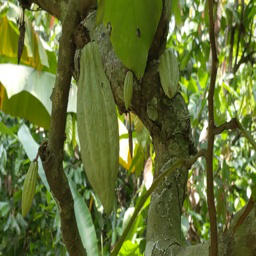

          confidence
cacao        99.86 %
starfruit     0.06 %


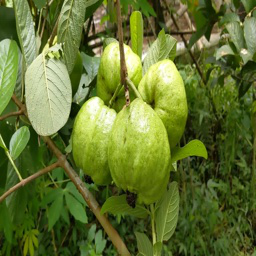

           confidence
guava         99.12 %
passiflora     0.65 %


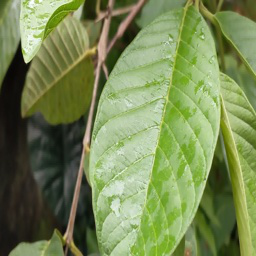

           confidence
guava         99.96 %
mangosteen     0.04 %


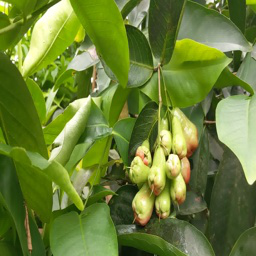

           confidence
waterguava    99.96 %
passiflora     0.01 %


In [11]:
# import thư viện
import os
import io
import cv2
import requests
import numpy as np
from PIL import Image
import base64
import json
import pandas as pd
import matplotlib.pyplot as plt

# kêt nối với sever
base_url = 'http://localhost:8000'
endpoint = '/predict'
url_with_endpoint_no_params = base_url + endpoint 
url_with_endpoint_no_params


# Gửi request đến server
def response_from_server(url, image_file, verbose=True):
    """Tạo POST request tới server và trả về phản hồi.

    Đối số:
        url (str): URL mà request được gửi đến.
        image_file (_io.BufferedReader): File để upload, phải là hình ảnh.
        verbose (bool): True nếu trạng thái của phản hồi được in ra. False thì ngược lại.

    Trả về:
        requests.models.Response: Phản hồi từ server.
    """
    
    files = {'file': image_file}
    response = requests.post(url, files=files)
    status_code = response.status_code
    if verbose:
        msg = "Everything went well!" if status_code == 200 else "There was an error when handling the request."
        print(status_code, msg)
    return response

# Để kiểm tra hàm này, hãy mở một file trong filesystem của bạn và truyền nó ở dạng tham số cùng với URL:
with open("1.jpg", "rb") as image_file:
    prediction = response_from_server(url_with_endpoint_no_params, image_file)


# tạo hàm để decode response
def display_respond(pred, img_encode, filename,directory = 'images_uploaded'):
#display image
    imgdata = base64.b64decode(img_encode)
    if not os.path.exists(directory):
        os.mkdir(directory)
    filename_full = f'{directory}/{filename}'  # I assume you have a way of picking unique filenames
    with open(filename_full, 'wb') as f:
        f.write(imgdata)
    im = Image.open(filename_full)
#     jupyter notebook
    display(im)
#     im.show()
    
#     plt.imshow(np.array(im))
#     plt.show()
    
# show prediction
    dict_all = {}
    for i in pred:
        dict_all.update(i)
    print(pd.DataFrame.from_dict(dict_all,'index',columns = ['confidence']))
    

# ảnh
image_files = [
    '1.jpg',
    '10.jpg',
    '100.jpg',
    '1000.jpg'
]

# trả kết quả
for image_file in image_files:
    with open(f"{image_file}", "rb") as image_file:
        prediction = response_from_server(url_with_endpoint_no_params, image_file, verbose=False)
        
    result = json.loads(prediction.content)
    
    fname, pred, img_encode = result['filename'],result['prediction'],result['encoded_img']
    display_respond(pred, img_encode, filename = 'rp_'+fname)